<a href="https://colab.research.google.com/github/raphaeldiscky/ml-projects/blob/main/Image%20Classification%20-%20GTSRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cv2
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data_dir = '/content/GTSRB'
train_path = '/content/GTSRB/Train'
test_path = '/content/GTSRB'

In [4]:
import os

# check total classes
total_classes = len(os.listdir(train_path))
total_classes

43

In [5]:
# naming label classes
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [6]:
# collect training data and image preprocessing
image_data = []
image_labels = []

for i in range(total_classes):
  path = data_dir + '/Train/' + str(i)
  images = os.listdir(path)

  for img in images:
    image = cv2.imread(path + '/' + img)
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((30, 30))
    image_data.append(np.array(resize_image))
    image_labels.append(i)

# change list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [7]:
print(image_data[0])

[[[235 236 222]
  [162 164 184]
  [165 156 154]
  ...
  [ 89  91 103]
  [ 64  76 100]
  [ 88  85 105]]

 [[237 237 221]
  [251 252 255]
  [255 255 255]
  ...
  [ 89  94 109]
  [ 79  85 109]
  [ 84  84 105]]

 [[231 232 222]
  [254 255 255]
  [243 246 240]
  ...
  [ 81  86 111]
  [ 74  82 107]
  [ 79  82 101]]

 ...

 [[ 54  72  74]
  [ 59  73  84]
  [ 63  81  92]
  ...
  [ 28  43  36]
  [ 40  51  47]
  [ 38  55  53]]

 [[ 59  86  87]
  [ 61  83  84]
  [ 61  80  84]
  ...
  [ 27  42  39]
  [ 32  45  40]
  [ 35  53  46]]

 [[ 50  77  77]
  [ 50  72  71]
  [ 54  77  75]
  ...
  [ 26  40  38]
  [ 25  38  33]
  [ 27  42  37]]]


In [8]:
print(len(image_data))

39209


In [9]:
# shuffle training data
arr = np.arange(len(image_data))
np.random.shuffle(arr)
image_data = image_data[arr]
image_labels = image_labels[arr]

In [10]:
# split data to train and test set
x_train, x_test, y_train, y_test = train_test_split(image_data, image_labels, test_size=0.2,  random_state=42, shuffle=True)

x_train = x_train/255
x_test = x_test/255

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31367, 30, 30, 3)
(7842, 30, 30, 3)
(31367,)
(7842,)


In [11]:
# one hot encoding the labels
y_train = tf.keras.utils.to_categorical(y_train, total_classes)
y_test = tf.keras.utils.to_categorical(y_test, total_classes)

print(y_train.shape)
print(y_test.shape)

(31367, 43)
(7842, 43)


In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
# create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(43, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# augmentating data
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest"
)

# callback function
class myCallback(tf.keras.callbacks.Callback):
   def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy') >= 0.95 and logs.get('val_accuracy') >= 0.92):
          print("\n Accuracy has reached >= 95%!")
          self.model.stop_training = True
callbacks = myCallback()

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=15, min_lr=0.00001, verbose=2)

In [18]:
# train model
history = model.fit(aug.flow(x_train, y_train, batch_size=32), 
                    epochs=30, 
                    validation_data=(x_test, y_test),
                    callbacks=[callbacks, reduce_lr])

Epoch 1/30
981/981 [==============================] - 91s 93ms/step - loss: 1.7283 - accuracy: 0.4696 - val_loss: 0.5499 - val_accuracy: 0.8599
Epoch 2/30
981/981 [==============================] - 93s 95ms/step - loss: 0.7419 - accuracy: 0.7569 - val_loss: 0.1467 - val_accuracy: 0.9598
Epoch 3/30
981/981 [==============================] - 93s 95ms/step - loss: 0.4417 - accuracy: 0.8587 - val_loss: 0.0960 - val_accuracy: 0.9717
Epoch 4/30
981/981 [==============================] - 94s 95ms/step - loss: 0.3161 - accuracy: 0.9014 - val_loss: 0.0437 - val_accuracy: 0.9889
Epoch 5/30
981/981 [==============================] - 93s 95ms/step - loss: 0.2519 - accuracy: 0.9210 - val_loss: 0.0322 - val_accuracy: 0.9917
Epoch 6/30
981/981 [==============================] - 94s 95ms/step - loss: 0.2238 - accuracy: 0.9299 - val_loss: 0.0319 - val_accuracy: 0.9906
Epoch 7/30
981/981 [==============================] - 93s 95ms/step - loss: 0.1859 - accuracy: 0.9422 - val_loss: 0.0208 - val_accuracy:

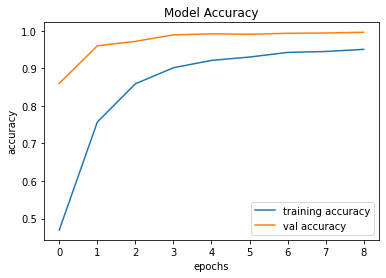

In [21]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

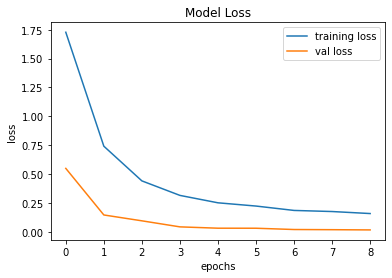

In [22]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [24]:
# convert and save model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite','wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpuyn_epvu/assets


INFO:tensorflow:Assets written to: /tmp/tmpuyn_epvu/assets
